In [ ]:
%load_ext autoreload
%autoreload 2
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.signal import medfilt
import cartopy.crs as crs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import netCDF4 as nc
plt.rcParams.update({
    "text.usetex": True,                # Enable LaTeX text rendering
    "font.family": "serif",             # Use a serif font
    "font.serif": ["Computer Modern"],  # Set font to Computer Modern (LaTeX default)
})
sys.path.append('../src/')
from Biologging_Toolkit.auxiliary.Whales import Whales
from Biologging_Toolkit.plot.whales import *
import warnings
warnings.filterwarnings("ignore")

In [40]:
ker = ['ml17_280a', 'ml18_294b', 'ml19_292a', 'ml19_293a']
arg = ['ml18_296a','ml19_292b','ml19_294a']

In [51]:
depid = 'ml19_293a'
ds_path = 'D:/individus_brut/individus'
ctd_path = 'D:/individus_brut/CTD1'
annotation_path = 'D:/drift_dives_SES/'

In [87]:
w = Whales(ker+arg, annotation_path = [os.path.join(annotation_path, dep, 'formatted_timestamps.csv') for dep in ker+arg])
w.idx = 0

In [ ]:
w.load_data(annotation_path = 'C:/Users/grosmaan/Desktop/Results/annotations.pkl',
            daily_path = 'C:/Users/grosmaan/Desktop/Results/daily_pool.pkl')

In [88]:
w.categorize()
w.day_pooling()

In [90]:
w.join_auxiliary(paths = [os.path.join(ds_path, dep, f'{dep}_sens.nc') for dep in ker+arg],
                 save = False, save_path = 'C:/Users/grosmaan/Desktop/Results')

In [91]:
w.join_CTD(paths = [os.path.join(ctd_path, f'{dep}_fr1_prof.nc') for dep in ker+arg],
           save = False, save_path = 'C:/Users/grosmaan/Desktop/Results')

## Bubble maps

In [ ]:
ml = arg[2]
bubble_map(w, ml, save_path = f'C:/Users/grosmaan/Desktop/Results/{ml}_whale_map.pdf', legend_loc = 'upper left')

## Logistic Regression

In [94]:
y_test, y_pred, X_test = w.simple_logistic_regression(depids = ker, ind_var = ['jerk','flash', 'temp'])

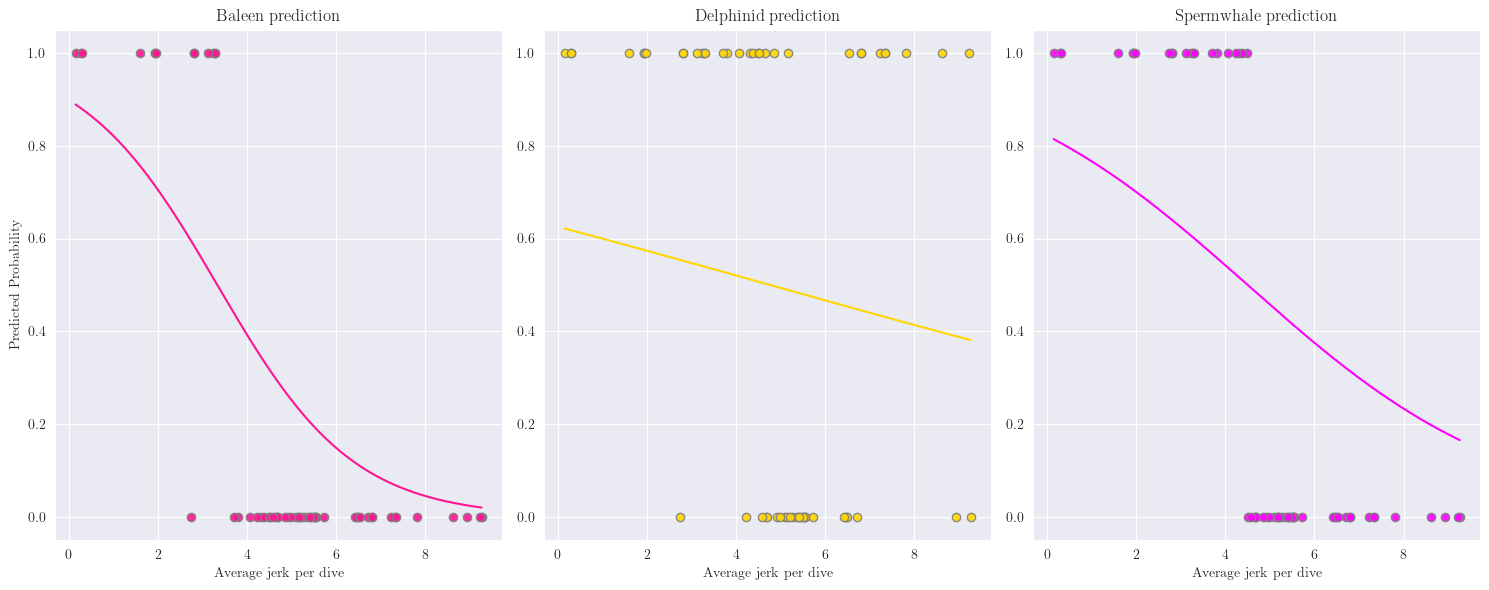

In [19]:
plot_logistic_laws(y_pred, X_test, w, save = False, save_path = 'C:/Users/grosmaan/Desktop/Results')

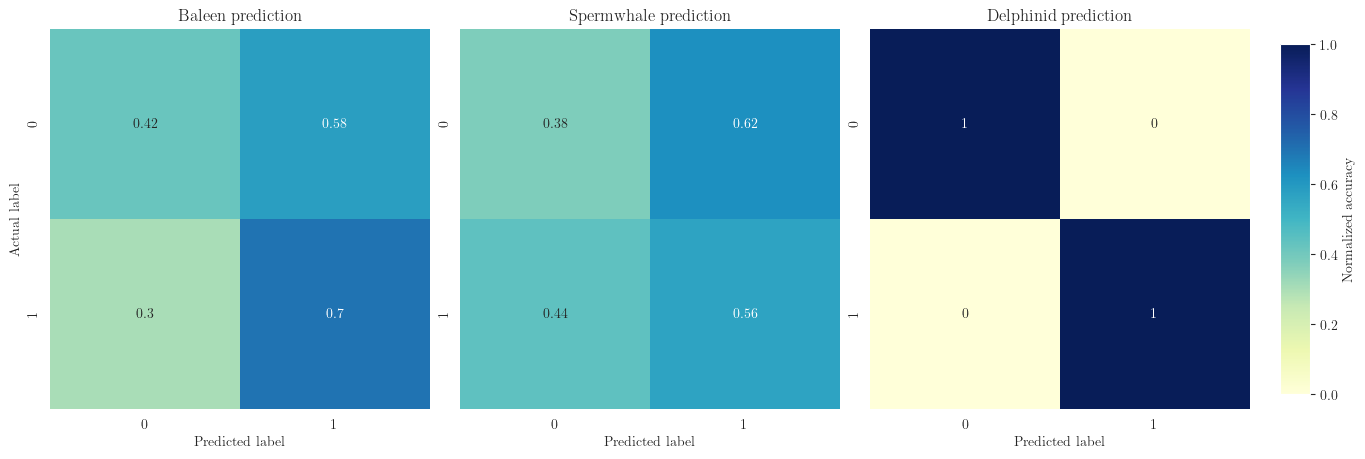

In [95]:
prediction_conf_matrix(y_test, y_pred, save = True, save_path = 'C:/Users/grosmaan/Desktop/Results')

## Statistics

In [ ]:
ker = ['ml17_280a', 'ml18_294b', 'ml19_292a', 'ml19_293a']
arg = ['ml18_296a','ml19_292b','ml19_294a']

data_arg = pd.DataFrame()
for depid in arg:
    data_arg = pd.concat((data_arg, pd.read_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'))))
data_arg['drift_time'] = data_arg.end_drift - data_arg.start_drift
data = data_arg[data_arg.drift_time > 120]
len_arg = len(data_arg)
#arg_drift = np.tile(data_arg.drift_time, (3,1)).T.flatten()
arg_drift = data_arg.drift_time.to_numpy()
data_arg = data_arg[['Annotation', 'Annotation2', 'Annotation3']].astype(str).to_numpy().flatten()
_label_arg, _count_arg = np.unique(data_arg, return_counts=True)
data_ker = pd.DataFrame()
for depid in ker:
    data_ker = pd.concat((data_ker, pd.read_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'))))
data_ker['drift_time'] = data_ker.end_drift - data_ker.start_drift
data_ker = data_ker[data_ker.drift_time > 120]
len_ker = len(data_ker)
#ker_drift = np.tile(data_ker.drift_time, (3,1)).T.flatten()
ker_drift = data_ker.drift_time.to_numpy()
data_ker = data_ker[['Annotation', 'Annotation2', 'Annotation3']].astype(str).to_numpy().flatten()
_label_ker, _count_ker = np.unique(data_ker, return_counts=True)

In [ ]:
ker_drift

In [ ]:
#### FIND TIME PERCENTAGE OF DETECTIONS
total_ker = ker_drift.sum()
ker_bal = ['ABW','FW','MW','SW','HW','Sweep','Downsweep','SRW']
ker_odo = ['Unidentified clicks', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle']
print('KER WHALE : ', ker_drift[np.max(np.isin(data_ker, ker_bal).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_ker)
print('KER ODONTOCETES : ', ker_drift[np.max(np.isin(data_ker, ker_odo).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_ker)
print('KER SPERMWHALE : ', ker_drift[np.max(np.isin(data_ker, ['Spermwhale']).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_ker)

total_arg = arg_drift.sum()
arg_bal = ['ABW','FW','MW','SW','HW','Sweep','Downsweep','SRW']
arg_odo = ['Unidentified clicks', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle']
print('ARG WHALE : ', arg_drift[np.max(np.isin(data_arg, arg_bal).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_arg)
print('ARG ODONTOCETES : ', arg_drift[np.max(np.isin(data_arg, arg_odo).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_arg)
print('ARG SPERMWHALE : ', arg_drift[np.max(np.isin(data_arg, ['Spermwhale']).astype(int).reshape(-1,3), axis = 1).astype(bool)].sum()/total_arg)


In [ ]:
hist_arg = pd.DataFrame({'Number of drift dives':len_arg,
                        'Baleen':_count_arg[np.isin(_label_arg, ['ABW','FW','MW','SW','HW','Sweep','Downsweep','SRW'])].sum(),
                        'Other odontocetes':_count_arg[np.isin(_label_arg, ['Unidentified clicks', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle'])].sum(),
                        'Spermwhale':_count_arg[np.isin(_label_arg, ['Spermwhale'])]}).T.reset_index()
hist_arg.columns = ['Label', 'Count']
hist_ker = pd.DataFrame({'Number of drift dives':len_ker,
                        'Baleen':_count_ker[np.isin(_label_ker, ['ABW','FW','MW','SW','HW','Sweep','Downsweep','SRW'])].sum(),
                        'Other odontocetes':_count_ker[np.isin(_label_ker, ['Unidentified clicks', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle'])].sum(),
                        'Spermwhale':_count_ker[np.isin(_label_ker, ['Spermwhale'])]}).T.reset_index()
hist_ker.columns = ['Label', 'Count']
primary_label = 'Number of drift dives'

# Separate data
primary_arg = hist_arg[hist_arg['Label'] == primary_label]
secondary_arg = hist_arg[hist_arg['Label'] != primary_label]

primary_ker = hist_ker[hist_ker['Label'] == primary_label]
secondary_ker = hist_ker[hist_ker['Label'] != primary_label]

# Calculate shared y-limits
primary_max = max(primary_arg['Count'].max(), primary_ker['Count'].max())
secondary_max = max(secondary_arg['Count'].max(), secondary_ker['Count'].max())

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=False)

# Argentina subplot
ax1 = axs[0]
ax1.bar(primary_arg['Label'], primary_arg['Count'], color='tab:blue')
ax1.set_ylabel('Number of drift dives', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, primary_max * 1.1)

ax1_2 = ax1.twinx()
ax1_2.bar(secondary_arg['Label'], secondary_arg['Count'], color='tab:orange')
ax1_2.set_ylabel('Other counts', color='tab:orange')
ax1_2.tick_params(axis='y', labelcolor='tab:orange')
ax1_2.set_ylim(0, secondary_max * 1.1)
ax1.set_title('Argentina')
ax1.set_xticklabels(['Number of drift dives', 'Baleen', 'Other odontocetes', 'Spermwhale'], rotation=45)

# Kerguelen subplot
ax2 = axs[1]
ax2.bar(primary_ker['Label'], primary_ker['Count'], color='tab:blue')
ax2.set_ylabel('Number of drift dives', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, primary_max * 1.1)

ax2_2 = ax2.twinx()
ax2_2.bar(secondary_ker['Label'], secondary_ker['Count'], color='tab:orange')
ax2_2.set_ylabel('Other counts', color='tab:orange')
ax2_2.tick_params(axis='y', labelcolor='tab:orange')
ax2_2.set_ylim(0, secondary_max * 1.1)
ax2.set_title('Kerguelen')
ax2.set_xticklabels(['Number of drift dives', 'Baleen', 'Other odontocetes', 'Spermwhale'], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('C:/Users/grosm/Desktop/thèse/Figures/hisogramme_detections.pdf')

In [ ]:
pd.DataFrame({'label':_label, 'count':_count})

### LOGISTIC REGRESSION

In [ ]:
idx = 1


## Get map of detections per deployment

In [ ]:
ds = nc.Dataset(os.path.join(ds_path, depid, depid+'_sens.nc'))
dive = pd.read_csv(os.path.join(ds_path, depid, depid+'_dive.csv'))
annot = pd.read_csv(os.path.join(annotation_path, depid, 'timestamps.csv'))

In [ ]:
def successive_detections(series):
    changes = series.diff().fillna(0)
    starts = changes == 1 
    ends = changes == -1
    cumulative = series.cumsum() 
    lengths = cumulative[ends].diff().fillna(cumulative[ends]) 
    result = np.zeros_like(series)
    result[ends[ends].index] = lengths.values
    return pd.Series(result, index=series.index)

def sliding_window_sum(time_series, N):
    result = np.zeros_like(time_series)
    for i in range(len(time_series) - N + 1):
        result[i + N - 1] = np.sum(time_series[i:i + N])
    return result

In [ ]:
labels = np.unique(np.concatenate([annot[col].dropna() for col in ['Annotation','Annotation2','Annotation3']]))
annot_pos = np.searchsorted(dive.begin_time, annot.start_drift)-1
annotations = {label : np.zeros(len(dive)) for label in labels}
'''annotations = {'Blue whale':np.zeros(len(dive))
               'Antarctic blue whale':np.zeros(len(dive)),
               'Sperm whale':np.zeros(len(dive)),
               'Sei whale':np.zeros(len(dive)),
               'Humpback whale':np.zeros(len(dive)),
               'Fin whale':np.zeros(len(dive)),
               'Minke whale':np.zeros(len(dive))}'''
print(labels)

In [ ]:
idx = 1
for i, row in annot.iterrows() :
    det = row[['Annotation', 'Annotation2', 'Annotation3']].to_numpy()
    conf = row[['Indice', 'Indice2', 'Indice3']].to_numpy()
    det = det[conf >= idx]
    for _det in det :
        if _det in ['Antarctic blue whale', 'Dcall', 'Blue whale'] :
            annotations['Antarctic blue whale'][annot_pos[i]] = 1
        elif _det=='Minke whale':
            annotations['Minke whale'][annot_pos[i]] = 1
        elif _det=='Spermwhale':
            annotations['Spermwhale'][annot_pos[i]] = 1
        elif _det=='Fin whale':
            annotations['Fin whale'][annot_pos[i]] = 1
        elif _det=='Humpback whale':
            annotations['Humpback whale'][annot_pos[i]] = 1
        elif _det=='Sei whale':
            annotations['Sei whale'][annot_pos[i]] = 1
        elif _det in['Odontocete clicks', 'Odontocete buzz', 'Odontocete whistle'] :
            annotations['Odontocete clicks'][annot_pos[i]] = 1
annotations = pd.DataFrame(annotations)
for key in list(annotations.keys()) :
    dive[key] = successive_detections(annotations[key])

In [ ]:
baleen_whales = ['Antarctic Blue Whale', 'Antarctic blue whale', 'Blue whale ', 'Dcall', 'Downsweep', 'Fin whale',
                 'Humpback whale', 'Minke whale', 'Sei whale', 'Southern Right Whale', 'Southern Right Whales']
odontocetes = ['Buzz', 'Clicks', 'Delphinid click', 'Ind clicks 18kHz', 'Odontocete buzz', 'Odontocete clicks',
               'Odontocete whistle', 'Spermwhale', 'Unidentified clicks', 'Unindentified clicks',
               'Unindentified whistle', 'Unknown buzz', 'Unknown clicks', 'delphinid click', 'delphinid whistle']

In [ ]:
dive['baleen'] = dive[dive.columns[np.isin(dive.columns, baleen_whales)]].sum(axis = 1)
dive['odontocetes'] = dive[dive.columns[np.isin(dive.columns, odontocetes)]].sum(axis = 1)

In [ ]:
proxy = {"Flash":"flash", "PCA":"total_jerk"}
#columns = list(dive[annotations.columns].sum()[dive[annotations.columns].sum() > 0].index)
columns = ['baleen', 'odontocetes']
fig, ax = plt.subplots(1,3, figsize=(15, 5), subplot_kw={'projection': crs.PlateCarree()})
for key in proxy.keys() :
    _temp = sliding_window_sum(dive[proxy[key]], 10)
    dive[key] = (_temp - np.nanmean(_temp)) / np.nanstd(_temp)
    columns.append(key)

colors = colormaps.get_cmap('plasma').resampled(len(columns))
for i, elem in enumerate(columns) :
    if np.isin(elem, ['baleen', 'odontocetes']) :
        j = 0
        _label = 'Cetacean detection'
    else :
        j = i-1
        _label = elem
    ax[j].set_extent([67, 85, -48, -55], crs=crs.PlateCarree())  # Adjust the limits as needed
    ax[j].plot(dive.lon, dive.lat, c = 'k', linewidth = 2)
    ax[j].scatter(dive.lon, dive.lat, s = dive[elem] * 50, c = colors((i-1)%4), label = elem.capitalize())
    if j == 0:
        ax[j].legend()
    ax[j].add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax[j].add_feature(cfeature.LAND, edgecolor='black')
    #ax[j].add_feature(cfeature.COASTLINE)
    #ax[j].add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax[j].gridlines(draw_labels=True)
    ax[j].set_title(_label)
fig.tight_layout()

In [ ]:
fig.savefig("C:/Users/grosmaan/Desktop/Results/ml19_293a_whales.pdf")

## Map / Bubble plot of cetacean detections and PCA

## Plot of temporal series

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
dive["begin_time"] = pd.to_datetime(dive["begin_time"], unit="s")
columns = list(dive[annotations.columns].sum()[dive[annotations.columns].sum() > 0].index)
colors = colormaps.get_cmap('viridis').resampled(len(columns))
ax1 = ax.twinx()
ax.scatter(dive.begin_time[dive.total_jerk > 0], dive.total_jerk[dive.total_jerk > 0], 
           alpha = 0.2, c = 'orange', label = 'PCA')
ax.plot(dive.begin_time, medfilt(dive.total_jerk, 101), c = 'orange', label = 'median PCA')
for i, elem in enumerate(columns[::-1]) :
    ax1.plot(dive.begin_time, dive[elem], c = colors(i), linewidth = 3, label = elem)
ax.set_facecolor('whitesmoke')
ax1.grid()
ax.tick_params(axis='x', rotation=45)
handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
legend = ax.legend(handles_ax + handles_ax1, labels_ax + labels_ax1, loc="upper left")
ax.set_ylabel("Number of prey catch attempts (PCA)")
ax1.set_ylabel("Number of recordings with detection")

In [ ]:
fig.savefig("C:/Users/grosm/Desktop/thèse/Figures/")

## Pooling detections

In [ ]:
depids = ['ml17_280a', 'ml18_296a', 'ml18_294b', 'ml19_292a', 'ml19_292b', 'ml19_293a', 'ml19_294a'] #'ml20_293a', 'ml20_296b', 'ml20_313a', 'ml21_295a', 'ml21_305b']
depids = ['ml18_296a', 'ml19_292b', 'ml19_294a']
depids = ['ml17_280a', 'ml18_294b', 'ml19_292a', 'ml19_293a']


In [ ]:
from glob import glob
detections = pd.DataFrame()
for depid in depids :
    fns = sorted(glob(os.path.join(ds_path, depid, 'dives', '*')))
    last_time = np.load(fns[-1])['time'][-1]
    data = nc.Dataset(os.path.join(ds_path, depid, f'{depid}_sens.nc'))
    _data = pd.DataFrame({'depth':data['depth'][:], 'time':data['time'][:],
                      'lat':data['lat'][:], 'lon':data['lon'][:], 'acc':data['acc_drift'][:],
                       'depth_drift':data['depth_drift'][:], 'dives':data['dives'][:]})
    _data = _data[_data.time<last_time]
    _data['drift'] = _data.depth_drift.to_numpy().astype(int) & _data.acc.to_numpy().astype(int)
    _data.drift.loc[_data.depth.to_numpy() < 200] = 0
    _data = _data.groupby('dives').agg({'lat':'mean', 'lon':'mean', 'drift':'max', 'time':'mean'})
    _data['depid'] = depid
    detections = pd.concat((detections,_data))

In [ ]:
detections[['depid', 'drift']].groupby('depid').agg({'drift':'sum'})

In [ ]:
detections['timestamp'] = pd.to_datetime(detections['time'], unit='s')
detections['date'] = detections['timestamp'].dt.date
day_pool = detections.groupby(['date', 'depid']).agg({'lat':'mean','lon':'mean','drift':'sum'}).reset_index()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': crs.PlateCarree()})
ker = ['ml17_280a', 'ml18_294b', 'ml19_292a', 'ml19_293a']
arg = ['ml18_296a','ml19_292b','ml19_294a']
zone1 = [50, 90, -40, -65]
zone2 = [-80, -40, -35, -60]
for i, (dep, zone) in enumerate(zip([ker, arg],[zone1,zone2])) :
    ax[i].set_extent(zone, crs=crs.PlateCarree())
    _dive = day_pool[day_pool.depid.isin(dep)]
    ax[i].scatter(detections.lon, detections.lat, c = 'k', s = 0.2)
    ax[i].scatter(day_pool.lon, day_pool.lat, s = day_pool.drift*5, c = day_pool.drift, cmap = 'viridis')
    ax[i].add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax[i].add_feature(cfeature.LAND, edgecolor='black')
    ax[i].add_feature(cfeature.COASTLINE)
    ax[i].add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax[i].gridlines(draw_labels=True)
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
legend_drifts = [1, 5, 10, 15, 20]
norm = Normalize(vmin=day_pool.drift.min(), vmax=day_pool.drift.max())
cmap = plt.cm.viridis
legend_handles = [
    plt.scatter([], [], s=d*5, color=cmap(norm(d)), label=d)
    for d in legend_drifts
]
ax[0].legend(handles=legend_handles, title='Number of drift dives', loc='lower left')
fig.tight_layout()

In [ ]:
fig.savefig('C:/Users/grosm/Desktop/thèse/Figures/drift_dives.pdf')

In [ ]:
depids = ['ml18_296a', 'ml19_292b', 'ml19_294a']
#depids = ['ml17_280a', 'ml18_294b', 'ml19_292a', 'ml19_293a']
detections = pd.DataFrame()
eleph = pd.DataFrame()
for depid in depids:
    eleph = pd.concat((eleph, pd.read_csv(os.path.join(ds_path, depid, f'{depid}_dive.csv'))))
    try:
        annot = pd.read_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'), delimiter=',')
        if annot.shape[1] == 1:
            raise ValueError("Probably wrong delimiter")
    except:
        annot = pd.read_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'), delimiter=';')
    annot['depid'] = depid
    annot['drift_time'] = annot.end_drift - annot.start_drift
    annot = annot[annot.drift_time < 180]
    detections = pd.concat((detections, annot))


In [ ]:
labels = [str(label) for label in np.unique(list(detections[['Annotation', 'Annotation2', 'Annotation3']].to_numpy().ravel()))]
print(labels)

In [ ]:
for label in labels :
    detections[label] = np.sum([np.array([detections[_annot] == label]).astype(int).flatten() for _annot in ['Annotation','Annotation2','Annotation3']], axis = 0)
detections = detections[['start_drift', 'end_drift', 'lat', 'lon','orig_fn', 'start_fn', 'fn','MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW', 'Spermwhale', 'SRW', 'Buzz', 'Delphinid clicks', 'Delphinid whistle', 'Downsweep']]

#['start_drift', 'end_drift', 'lat', 'lon','orig_fn', 'start_fn', 'fn','MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW', 'Spermwhale', 'SRW', 'HW','Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle', 'Downsweep']
#['start_drift', 'end_drift', 'lat', 'lon','orig_fn', 'start_fn', 'fn','MW', 'ABW', 'FW', 'Spermwhale', 'SRW', 'HW','Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle']
#['start_drift', 'end_drift', 'lat', 'lon','orig_fn', 'start_fn', 'fn','MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW', 'Spermwhale', 'SRW', 'Buzz', 'Delphinid clicks', 'Delphinid whistle', 'Downsweep']

In [ ]:
'''for col in ['MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW', 'Spermwhale', 'SRW', 'HW', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle', 'Downsweep'] :
    detections[col] = sliding_window_sum(detections[col] , 5)'''
detections['timestamp'] = pd.to_datetime(detections['start_drift'], unit='s')
detections['date'] = detections['timestamp'].dt.date

In [ ]:
_bal = np.array(['MW', 'Sweep','ABW', 'FW', 'SW', 'SRW', 'Downsweep'])
_odo = np.array(['Unidentified clicks', 'Buzz', 'Delphinid clicks', 'Delphinid whistle'])
baleen = detections[_bal[np.isin(_bal, ['MW', 'ABW', 'FW', 'SRW', 'HW'])]]
baleen['baleen'] = baleen.sum(axis = 1)
odontocetes = detections[_odo[np.isin(_odo, ['Buzz', 'Delphinid clicks', 'Delphinid whistle'])]]
odontocetes['odontocetes'] = odontocetes.sum(axis = 1)
spermwhale = pd.DataFrame(detections['Spermwhale'])

In [ ]:
baleen['timestamp'] = pd.to_datetime(detections['start_drift'], unit='s')
odontocetes['timestamp'] = pd.to_datetime(detections['start_drift'], unit='s')
eleph['timestamp'] = pd.to_datetime(eleph['begin_time'], unit='s')
spermwhale['timestamp'] = pd.to_datetime(detections['start_drift'], unit = 's')
baleen['date'] = baleen['timestamp'].dt.date
odontocetes['date'] = odontocetes['timestamp'].dt.date
eleph['date'] = eleph['timestamp'].dt.date
spermwhale['date'] = spermwhale['timestamp'].dt.date
eleph = eleph[['date', 'flash', 'total_jerk']]
baleen = baleen[['date', 'baleen']]
odontocetes = odontocetes[['date', 'odontocetes']]

In [ ]:
baleen = baleen.groupby('date').agg('mean')
odontocetes = odontocetes.groupby('date').agg('mean')
spermwhale = spermwhale.groupby('date').agg('mean')

In [ ]:
merged_df = pd.merge(odontocetes, baleen, on='date', how='outer')
merged_df = pd.merge(merged_df, spermwhale, on='date', how='outer')
final_df = pd.merge(merged_df, eleph, on='date', how='left')
final_df = final_df.groupby('date').agg('mean')

In [ ]:
value = 'total_jerk'
bins = np.linspace(final_df[value].min(), final_df[value].max(), 10)
final_df['bin'] = pd.cut(final_df[value], bins)
result = final_df.groupby('bin').agg({'baleen':'mean','odontocetes':'mean','Spermwhale':'mean'}).reset_index()
result['midpoints'] = final_df.groupby('bin').mean().index.map(lambda x: x.mid).astype(float)

In [ ]:
result.columns = ['bin', 'Baleen whales',  'Other odontocetes', 'Spermwhale','midpoints']


In [ ]:
result = result[['midpoints','Baleen whales',  'Other odontocetes', 'Spermwhale']].melt(id_vars = ['midpoints'])

In [ ]:
result.fillna(0, inplace = True)

In [ ]:
from scipy.interpolate import PchipInterpolator
import numpy as np

# Assume `df` has columns: 'midpoints', 'value', and 'variable'
fig, ax = plt.subplots(figsize = (8,8))
for var, group in result.groupby('variable'):
    x = group['midpoints']
    y = group['value']

    # Sort to avoid errors
    x, y = zip(*sorted(zip(x, y)))

    x_smooth = np.linspace(min(x), max(x), 100)
    pchip = PchipInterpolator(x, y)
    y_smooth = pchip(x_smooth)

    ax.plot(x_smooth, y_smooth, label=var)

ax.legend()
ax.set_xlabel('Average number of PrCA per dive')
ax.set_ylabel('Detection probability')
ax.grid(True)
fig.savefig('C:/Users/grosm/Desktop/thèse/Figures/Cetacean_vs_jerk_arg.pdf')


In [ ]:
melted = final_df[['odontocetes', 'baleen', 'Spermwhale', 'flash', 'total_jerk']].melt(id_vars = ['total_jerk', 'flash'])

In [ ]:
fig, ax = plt.subplots()
plt.scatter(final_df.flash, final_df.Spermwhale)
plt.scatter(final_df.flash, final_df.baleen)
plt.scatter(final_df.flash, final_df.odontocetes)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.kdeplot(data=melted, x='total_jerk', weights='value', hue='variable',
            fill=True, common_norm=False, alpha=0.6, ax=ax[0])
ax[0].set_xlabel('PCA')
sns.kdeplot(data=melted, x='flash', weights='value', hue='variable',
            fill=True, common_norm=False, alpha=0.6, ax=ax[1])
ax[1].set_xlabel('Flash')
ax[0].set_ylabel('Density')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Label')
fig.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

In [ ]:
ses = pd.read_csv(os.path.join(ds_path, 'ml17_280a', f'ml17_280a_dive.csv'))
ses['timestamp'] = pd.to_datetime(ses['begin_time'], unit = 's')
ses['date'] = ses['timestamp'].dt.date
ses = ses[['date', 'total_jerk']]
ses = ses.groupby('date').agg({'total_jerk': 'median'})

In [ ]:
from datetime import datetime
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.scatter(baleen.date, baleen.baleen, c = 'red')
ax1.scatter(odontocetes.date, odontocetes.odontocetes, c = 'green')
ax.scatter(eleph.date, eleph.total_jerk)
ax.set_xlim(datetime(2018,10,1), datetime(2018,12,1))

In [ ]:
agg = 'mean'
odontocetes = odontocetes.groupby('date').agg({'odontocetes': agg}).reset_index()
baleen = baleen.groupby('date').agg({'baleen': agg}).reset_index()
eleph = eleph.groupby('date').agg({'total_jerk': agg, 'flash': agg}).reset_index()

In [ ]:
merged_df = pd.merge(odontocetes, baleen, on='date', how='outer')
final_df = pd.merge(merged_df, eleph, on='date', how='outer')
merged_df = pd.merge(detections, eleph, on='date', how='outer')

In [ ]:
from scipy.signal import medfilt
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey = True)
ax[0].scatter(final_df.total_jerk, final_df.baleen, alpha = 0.8, c = 'crimson', label = 'Baleen whales')
ax[0].scatter(final_df.total_jerk, final_df.odontocetes, alpha = 0.8, c = 'powderblue', label = 'Odontocetes')
ax[1].scatter(final_df.flash, final_df.baleen, alpha = 0.8, c = 'crimson')
ax[1].scatter(final_df.flash, final_df.odontocetes, alpha = 0.8, c = 'powderblue')
ax[0].set_xlabel('PCA')
ax[0].legend()
ax[1].set_xlabel('Flash')
ax[0].set_ylabel('Cumulative detections per day')

In [ ]:
merged_df.columns

In [ ]:
from scipy.signal import medfilt
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey = True)
for col in ['MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW', 'Spermwhale', 'SRW', 'HW', 'Buzz', 'Clicks', 'Delphinid clicks', 'Delphinid whistle','Downsweep']:
    ax[0].scatter(medfilt(merged_df.total_jerk,11), np.convolve(merged_df[col], np.ones(3)/3, mode = 'same'), alpha = 0.8, label = col)
    ax[1].scatter(medfilt(merged_df.flash,11), np.convolve(merged_df[col], np.ones(3)/3, mode = 'same'), alpha = 0.8)
ax[0].set_xlabel('PCA')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Label')
ax[1].set_xlabel('Flash')
ax[0].set_ylabel('Cumulative detections per day')

In [ ]:
pca_vals = medfilt(merged_df.total_jerk, 11)
flash_vals = medfilt(merged_df.flash, 11)
import pandas as pd
data_list = []
for col in ['MW', 'Sweep', 'Unidentified clicks', 'ABW', 'FW', 'SW',
            'Spermwhale', 'SRW', 'HW', 'Buzz', 'Clicks',
            'Delphinid clicks', 'Delphinid whistle', 'Downsweep']:
    smoothed_col = np.convolve(merged_df[col], np.ones(3)/3, mode='same')
    data_list.append(pd.DataFrame({
        'PCA': pca_vals,
        'Flash': flash_vals,
        'Detections': smoothed_col,
        'Label': col
    }))
long_df = pd.concat(data_list)
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.kdeplot(data=long_df, x='PCA', weights='Detections', hue='Label',
            fill=True, common_norm=False, alpha=0.6, ax=ax[0])
ax[0].set_xlabel('PCA')
sns.kdeplot(data=long_df, x='Flash', weights='Detections', hue='Label',
            fill=True, common_norm=False, alpha=0.6, ax=ax[1])
ax[1].set_xlabel('Flash')
ax[0].set_ylabel('Density')
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Label')
fig.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

In [ ]:
fig.savefig('C:/Users/grosmaan/Desktop/Results/presence_density.png')

In [ ]:
final_df

### REFORMAT TIMESTAMPS.CSV

In [ ]:
#### FORMAT TIMESTAMPS
depids = ['ml17_280a', 'ml18_296a', 'ml18_294b', 'ml19_292a', 'ml19_292b', 'ml19_293a', 'ml19_294a']
for depid in depids :
    try:
        annot = pd.read_csv(os.path.join(annotation_path, depid, 'timestamps.csv'), delimiter=',')
        if annot.shape[1] == 1:
            raise ValueError("Probably wrong delimiter")
    except:
        annot = pd.read_csv(os.path.join(annotation_path, depid, 'timestamps.csv'), delimiter=';')
    for col in ['Annotation', 'Annotation2', 'Annotation3'] :
        _col = annot[col].astype(str).to_numpy()
        _col[np.isin(_col,  ['Antarctic Blue Whale', 'Antarctic blue whale', 'Blue whale ', 'Dcall'])] = 'ABW'
        _col[np.isin(_col,  ['Fin whale'])] = 'FW'
        _col[np.isin(_col,  ['Humpback whale'])] = 'HW'
        _col[np.isin(_col,  ['Minke whale'])] = 'MW'
        _col[np.isin(_col,  ['Sei whale'])] = 'SW'
        _col[np.isin(_col,  ['Southern Right Whale', 'Southern Right Whales'])] = 'SRW'
        _col[np.isin(_col,  ['delphinid click', 'Delphinid click', 'Odontocete clicks'])] = 'Delphinid clicks'
        _col[np.isin(_col,  ['Odontocete buzz', 'Buzz', 'Unknown buzz'])] = 'Buzz'
        _col[np.isin(_col,  ['Odontocete whistle', 'Unindentified whistle', 'delphinid whistle'])] = 'Delphinid whistle'
        _col[np.isin(_col,  ['Unidentified clicks', 'Unindentified clicks'])] = 'Unidentified clicks'
        annot[col] = _col
    annot.to_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'), index = None)

In [ ]:
#### CODE FOR UNFORMATTED TIMESTAMPS
detections = pd.DataFrame()
eleph = pd.DataFrame()
for depid in depids[:7]:
    eleph = pd.concat((eleph, pd.read_csv(os.path.join(ds_path, depid, f'{depid}_dive.csv'))))
    annot = pd.read_csv(os.path.join(annotation_path, depid, 'formatted_timestamps.csv'), delimiter=',')
    _annot = annot[['start_drift', 'end_drift', 'lat', 'lon', 'orig_fn', 'start_fn', 'fn','Annotation', 'Time', 'Indice', 'Notes']]
    detections = pd.concat((detections, _annot))
    _annot = annot[['start_drift', 'end_drift', 'lat', 'lon', 'orig_fn', 'start_fn', 'fn','Annotation2', 'Time2', 'Indice2', 'Notes2']]
    _annot.columns = ['start_drift', 'end_drift', 'lat', 'lon', 'orig_fn', 'start_fn', 'fn','Annotation', 'Time', 'Indice', 'Notes']
    detections = pd.concat((detections, _annot))
    _annot = annot[['start_drift', 'end_drift', 'lat', 'lon','orig_fn', 'start_fn', 'fn','Annotation3', 'Time3', 'Indice3', 'Notes3']]
    _annot.columns = ['start_drift', 'end_drift', 'lat', 'lon', 'orig_fn', 'start_fn', 'fn','Annotation', 'Time', 'Indice', 'Notes']
    detections = pd.concat((detections, _annot))


In [ ]:
baleen_whales = ['Antarctic Blue Whale', 'Antarctic blue whale', 'Blue whale ', 'Dcall','Downsweep', 'Fin whale','Humpback whale', 'Minke whale', 'Sei whale', 'Southern Right Whale', 'Southern Right Whales']

In [ ]:
odontocetes = ['Buzz', 'Clicks', 'Delphinid click', 'Ind clicks 18kHz', 'Odontocete buzz', 'Odontocete clicks', 'Odontocete whistle', 'Spermwhale', 'Unidentified clicks', 'Unindentified clicks', 'Unindentified whistle', 'Unknown buzz', 'Unknown clicks','delphinid click', 'delphinid whistle']

In [ ]:
#### PLOT FOR POLAR VIEW OF THREE DIFFERENT VARIABLES
baleen = detections[np.isin(detections['Annotation'], baleen_whales)]
odontocetes = detections[np.isin(detections['Annotation'], odontocetes)]
fig, ax = plt.subplots(1,3, figsize=(15,5), subplot_kw={'projection': crs.Orthographic(central_latitude=-90, central_longitude=0)})
ax = ax.flatten()
for i, _ax in enumerate(ax) :
    _ax.stock_img()
    if i == 0:
        _ax.scatter(x=baleen.lon, y=baleen.lat, s=10*np.ones(len(baleen)), c='black', transform=crs.PlateCarree())
    elif i == 1:
        _ax.scatter(x=odontocetes.lon, y=odontocetes.lat, s=10*np.ones(len(odontocetes)), c = 'gold', transform=crs.PlateCarree())
    elif i == 2:
        _ax.scatter(x=eleph.lon, y=eleph.lat, s= np.log(eleph.flash), transform=crs.PlateCarree())
fig.show()